In [88]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# **Import libraries**

for Read dicom images

In [ ]:
pip install pydicom 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.3 MB/s eta 0:00:00


In [ ]:
pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 11.7 MB/s eta 0:00:00


In [89]:
# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
# import pydicom
# import pydicom as dicom
from skimage import io
import os

# handle table-like data and matrices
import pandas as pd
import numpy as np
import glob
import random
import tensorflow.keras.backend as kb

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# model
from keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import *
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Model
from tensorflow.keras.models import load_model, save_model

# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential

# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

from tqdm import tqdm
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, Reshape, Input, Conv2DTranspose
from keras.layers import Activation, LeakyReLU, BatchNormalization, Dropout, Resizing
from keras.losses import BinaryCrossentropy
from tensorflow.keras.applications import VGG16
try:
    from tensorflow.keras.optimizers import Adam
except:
    from keras.optimizers import Adam

# import necessary packages
import time
import glob
import matplotlib
import matplotlib.image as mpimg
matplotlib.use('Agg')
%matplotlib inline
import PIL
import imageio

# import SimpleITK as sitk
from IPython import display
from IPython.display import Image
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from PIL import Image
from tensorflow.keras.optimizers import Adam
from matplotlib import *
from matplotlib import pyplot
from matplotlib.pyplot import *
import sys
from skimage import metrics
from skimage.metrics import structural_similarity as ssim

Content My Drive

In [90]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Convert Data From Dicom To Png**

In [ ]:
dicom_folder = input('input path')
print(dicom_folder)
png_folder = input('output path')
print(png_folder)

for filename in os.listdir(dicom_folder):
    
    if filename.endswith('.dcm'):
        ds = pydicom.dcmread(os.path.join(dicom_folder, filename))
        img = Image.fromarray(ds.pixel_array)
        png_filename = os.path.splitext(filename)[0] + '.png'
        img.save(os.path.join(png_folder, png_filename))


# **dealing with data**

Read Data From Drive

In [91]:
Patients_Directory_Path = "/content/drive/MyDrive/PET_Brain_Final"
#print(f"There are {len(os.listdir(Patients_Directory_Path))} total patients.\n")
Patients_Directory = os.listdir(Patients_Directory_Path)
Patients_Directory.sort()
print(Patients_Directory)

['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


Splitting data

In [92]:
train_ratio=1

In [93]:
random.seed(1)

train_patients = random.sample(Patients_Directory, int(len(Patients_Directory)*train_ratio))

other_patients = list(np.setdiff1d(Patients_Directory,train_patients))
        

In [ ]:
print(f"There are {len(train_patients)} train patients.\n")


There are 131 train patients.



 **Training Dataset**

In [94]:
train_images = []

for patient in train_patients:
    patient_path = os.path.join(Patients_Directory_Path, patient)
    print(patient_path)
    for filename in os.listdir(patient_path):
        f_path = os.path.join(patient_path, filename)
        train_images.append(f_path)
       


/content/drive/MyDrive/PET_Brain_Final/13
/content/drive/MyDrive/PET_Brain_Final/113
/content/drive/MyDrive/PET_Brain_Final/4
/content/drive/MyDrive/PET_Brain_Final/126
/content/drive/MyDrive/PET_Brain_Final/38
/content/drive/MyDrive/PET_Brain_Final/69
/content/drive/MyDrive/PET_Brain_Final/32
/content/drive/MyDrive/PET_Brain_Final/35
/content/drive/MyDrive/PET_Brain_Final/56
/content/drive/MyDrive/PET_Brain_Final/24
/content/drive/MyDrive/PET_Brain_Final/71
/content/drive/MyDrive/PET_Brain_Final/122
/content/drive/MyDrive/PET_Brain_Final/11
/content/drive/MyDrive/PET_Brain_Final/37
/content/drive/MyDrive/PET_Brain_Final/101
/content/drive/MyDrive/PET_Brain_Final/84
/content/drive/MyDrive/PET_Brain_Final/77
/content/drive/MyDrive/PET_Brain_Final/25
/content/drive/MyDrive/PET_Brain_Final/30
/content/drive/MyDrive/PET_Brain_Final/50
/content/drive/MyDrive/PET_Brain_Final/94
/content/drive/MyDrive/PET_Brain_Final/7
/content/drive/MyDrive/PET_Brain_Final/1
/content/drive/MyDrive/PET_Brain_

check Training Data

In [ ]:
print(len(train_images))

606


convert to a Numpy array

In [95]:
train_size = len(train_images)
training_images=np.array([np.array(Image.open(i),dtype="float32") for i in train_images[0:train_size]])
print('training images',training_images.shape)

training images (606, 256, 256)


# **Preprocessing**

Normalize pixel values

In [96]:

training_images = (training_images - 127.5 ) / 127.5

In [ ]:
print(training_images[0][10])

[-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -0.984252   -0.984252   -0.984252   -0.984252   -0.984252
 -0.96850395 -0.96850395 -0.96850395 -0.96850395 -0.96850395 -0.984252
 -0.984252   

Make into 4D array

In [97]:
training_images=training_images[:,:,:,np.newaxis]

Check shape

In [ ]:
print(training_images.shape)

(606, 256, 256, 1)


# **Check the brain images**

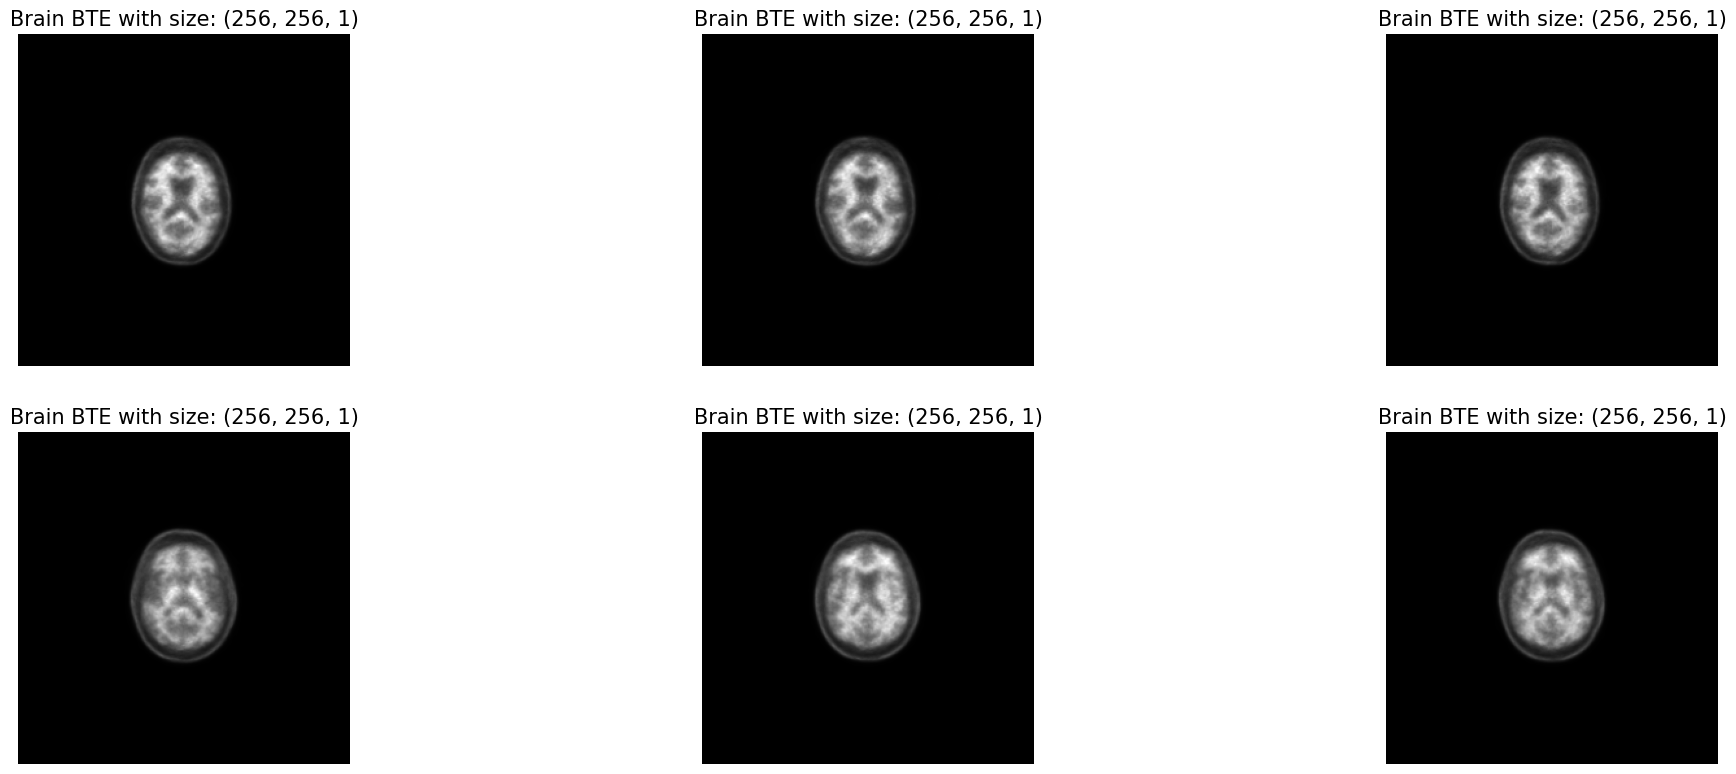

In [ ]:
#Check the brains, plot the first 6
pyplot.figure(figsize=(25,25))
for i in range(6):
    pyplot.subplot(5, 3, 1 + i)
    pyplot.axis('off')
    pyplot.title('Brain BTE with size: {}'.format(training_images[0].shape),fontsize=15)
    pyplot.imshow(training_images[i,:,:,0],cmap='gray')
pyplot.show()


# **Build Generator and discriminator**

In [98]:
def Generator():

    model = tf.keras.Sequential()

    model.add(Dense(32*32*256, input_shape=(256,)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((32, 32,256)))

    model.add(Conv2DTranspose(256, (4,4), strides=(2,2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    
    
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    
    
    model.add(Conv2DTranspose(64, (4,4), strides=(2,2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    

    model.add(Conv2D(64, (3,3), strides=(1,1), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))


    model.add(Conv2D(1, (3,3),strides=(1,1), padding='same', use_bias=False))
    
    return model

Check Generator Summary

In [99]:
g_model = Generator()
g_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 262144)            67371008  
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 262144)            0         
                                                                 
 reshape_3 (Reshape)         (None, 32, 32, 256)       0         
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 64, 64, 256)      1048576   
 ranspose)                                                       
                                                                 
 batch_normalization_24 (Bat  (None, 64, 64, 256)      1024      
 chNormalization)                                                
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 64, 64, 256)      

In [100]:
def Discriminator(input=(256,256,1)):

    model = tf.keras.Sequential()

    model.add(Conv2D(16, (4,4), strides=(2, 2), padding='same',input_shape=input))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(32, (4,4), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    
    model.add(Conv2D(64, (4,4), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(128, (4,4), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dense(1))
    return model

Check Generator Summary

In [101]:
d_model = Discriminator()
d_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 128, 16)      272       
                                                                 
 batch_normalization_28 (Bat  (None, 128, 128, 16)     64        
 chNormalization)                                                
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 128, 128, 16)      0         
                                                                 
 dropout_12 (Dropout)        (None, 128, 128, 16)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 64, 32)        8224      
                                                                 
 batch_normalization_29 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                     

# **Visualising generated images(Fake image)**

Number of samples to visualise and number of points in latent space

In [102]:
n_samples=5
latent_dim=256

generate noise according to number of samples and latent space

In [103]:
noise = tf.random.normal([n_samples, latent_dim])

generate fake (noise) images

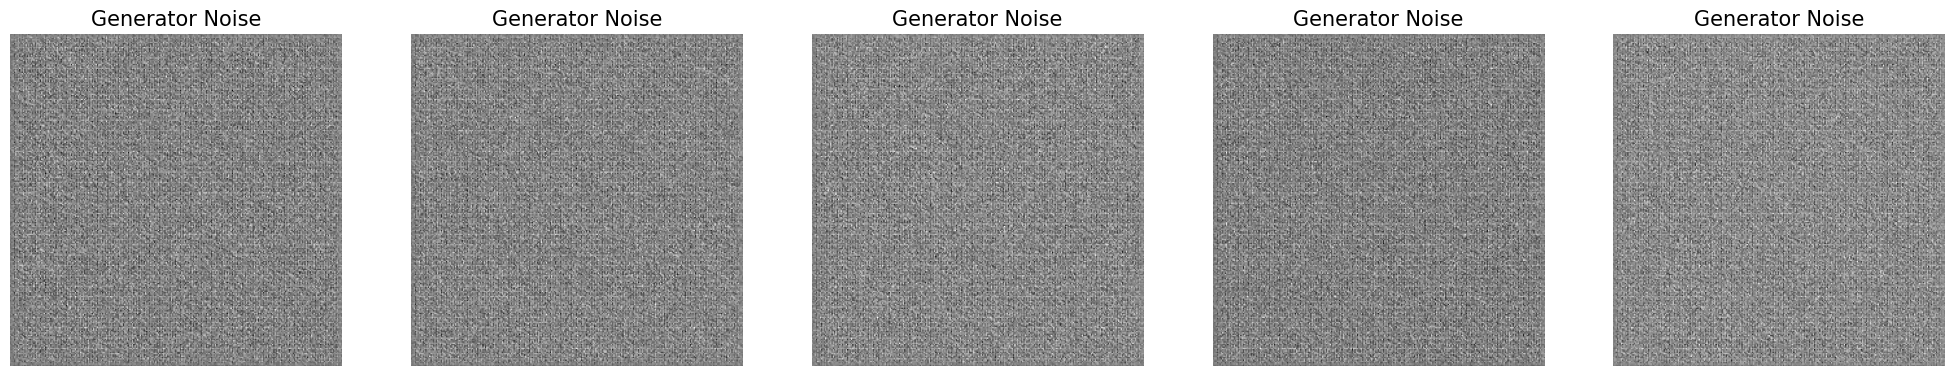

In [104]:
x_fake = g_model(noise,training=False)
pyplot.figure(figsize=(25,25))
for i in range(n_samples):
    pyplot.subplot(5, 5, 1 + i)
    pyplot.axis('off')
    pyplot.title('Generator Noise',fontsize=15)
    pyplot.imshow(x_fake[i, :, :,0],cmap='gray')
pyplot.show()
pyplot.close()

# **Test Discriminator**

In [ ]:
print (x_fake.shape)

(5, 256, 256, 1)


In [105]:
d_model.predict(x_fake)

1/1 [==============================] - 0s 106ms/step


array([[ 1.6333550e-04],
       [-2.2215863e-07],
       [ 4.6196772e-05],
       [ 6.5704022e-05],
       [ 6.0304945e-05]], dtype=float32)

# **Define loss functions**

In [106]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# **Define optimisers**

In [107]:
generator_optimiser = tf.keras.optimizers.Adam(learning_rate=0.0002)

discriminator_optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)

# **Training Functions**

In [108]:
batch_size = 10

@tf.function
def train_step(images):
    noise = tf.random.normal([batch_size, latent_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = g_model(noise, training=True)

        real_output = d_model(images, training=True)
        fake_output = d_model(generated_images, training=True)

        g_loss = generator_loss(fake_output)
        d_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(g_loss, g_model.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(d_loss, d_model.trainable_variables)

    generator_optimiser.apply_gradients(zip(gradients_of_generator, g_model.trainable_variables))
    discriminator_optimiser.apply_gradients(zip(gradients_of_discriminator, d_model.trainable_variables))
    return g_loss,d_loss 


# **Store generator and discriminator Loss Values**

In [109]:
d_loss_history = []
g_loss_history = []

# **Training Loop**

Batch and shuffle the data

In [110]:
total_size=training_images.shape[0]
train_dataset = tf.data.Dataset.from_tensor_slices(training_images).shuffle(total_size).batch(batch_size)

In [111]:
EPOCHS = 100

batch_per_epoch=np.round(training_images.shape[0]/batch_size)

def train(dataset, epochs):
    
    for epoch in range(epochs):
        count=0
        for image_batch in dataset:
          
            g_loss,d_loss=train_step(image_batch) 

            if (count) % 25 == 0:

                print('>%d, %d/%d, g=%.8f, d=%.8f' % (epoch, count, batch_per_epoch, g_loss, d_loss))
                
                g_loss_history.append(g_loss)
                d_loss_history.append(d_loss) 

            if (count) % 350 == 0:
                
                noise = tf.random.normal([n_samples, latent_dim])
                x_fake = g_model(noise,training=False)

                
                pyplot.figure(figsize=(25,25))
                for i in range(n_samples):

                    pyplot.subplot(5, 5, 1 + i)
                    pyplot.axis('off')
                    pyplot.imshow(x_fake[i, :, :,0],cmap='gray')

                pyplot.savefig('0511 Epoch{0} batch{1}.png'.format(epoch,count))
                pyplot.show()
                pyplot.close()
                filename = 'generator_model_%03d.h5' % (epoch) 
                g_model.save(filename)

            count=count+1

train(train_dataset, EPOCHS)


Output hidden; open in https://colab.research.google.com to view.

# **Display generated fake brain images**

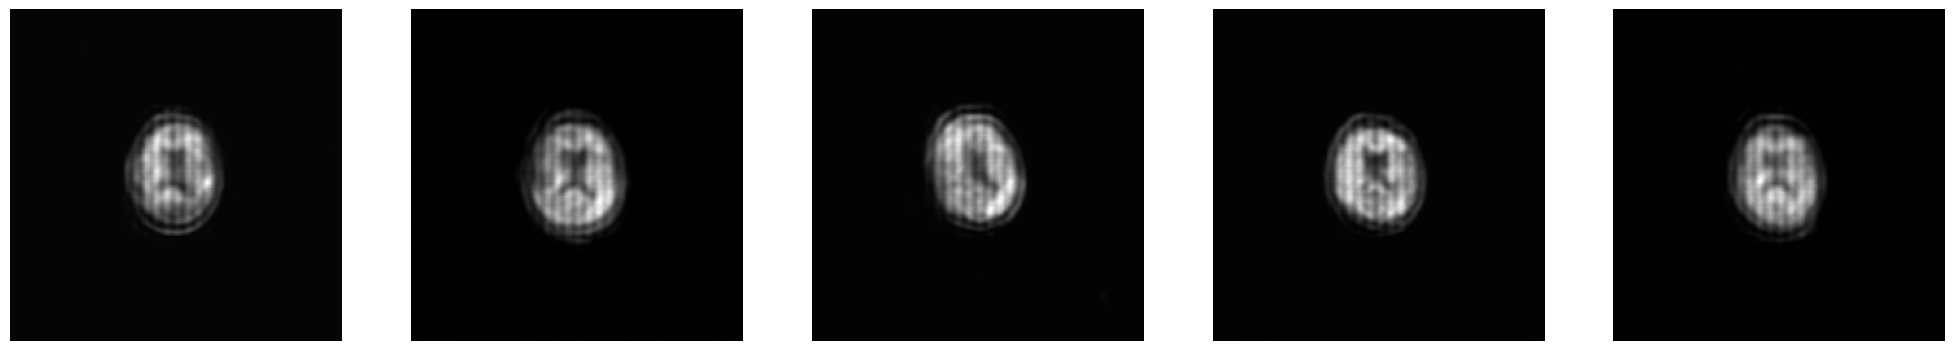

In [112]:
noise = tf.random.normal([n_samples, latent_dim])
x_fake = g_model(noise,training=False)

pyplot.figure(figsize=(25,25))
for i in range(n_samples):
    # define subplot
    pyplot.subplot(5, 5, 1 + i)
    pyplot.axis('off')
    # plot single image
    pyplot.imshow(x_fake[i, :, :,0],cmap='gray')
pyplot.show()
pyplot.close()

# **Model evaluation**

**Graph Generator and Discriminator Loss**

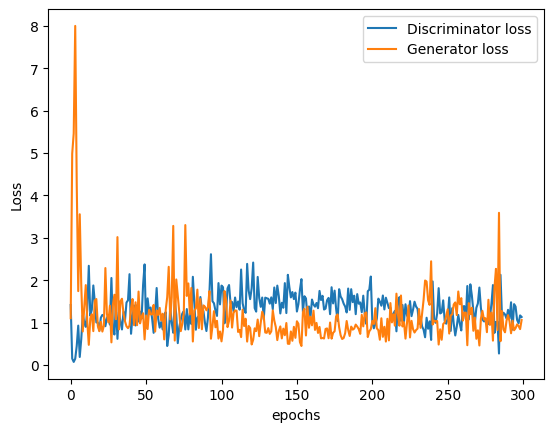

In [113]:
plt.plot(d_loss_history, label='Discriminator loss')
plt.plot(g_loss_history, label='Generator loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**SSIM**

In [114]:
whichfake=4
ssim_noise=[]

for i in range(training_images.shape[0]):
    ssim_noise.append( ssim(training_images[i,:,:,0], x_fake.numpy()[whichfake,:,:,0],data_range=np.max(x_fake.numpy()[whichfake,:,:,0]) - np.min(x_fake.numpy()[whichfake,:,:,0])))


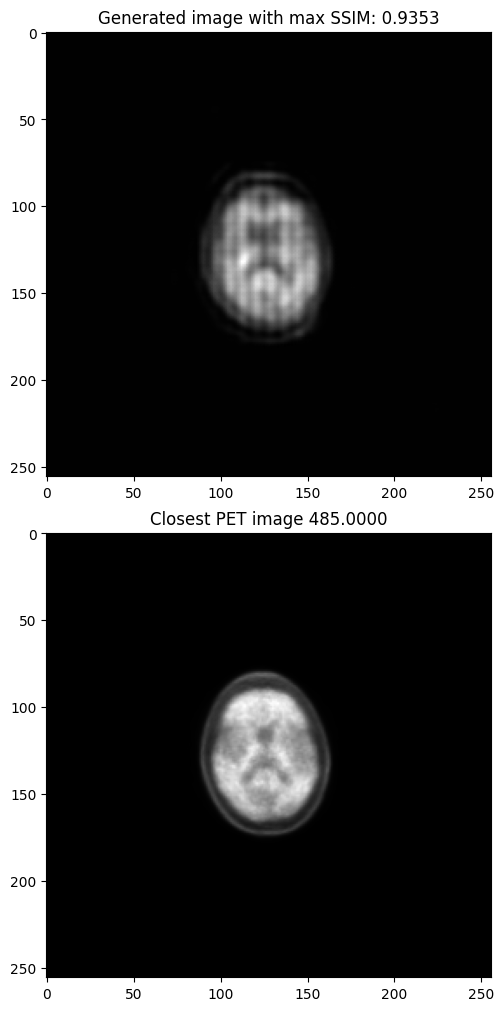

In [115]:
fig, axs = pyplot.subplots(2, 1, constrained_layout=True,figsize=(10,10))
axs[0].imshow(x_fake[whichfake, :, :, 0],cmap="gray")
axs[0].set_title('Generated image with max SSIM: {:.4f}'.format(np.max(ssim_noise)))

axs[1].imshow(training_images[ssim_noise.index(np.max(ssim_noise)), :, :, 0],cmap="gray")
axs[1].set_title('Closest PET image {:.4f}'.format(ssim_noise.index(np.max(ssim_noise))))

pyplot.show()